In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# 解決無法顯示中文問題
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

# 設定最多顯示數量
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

'''

從sklearn中讀取預處理好的dataset，並轉乘DataFrame
也可使用seaborn.load_datasets("iris")載入進來的type就是DataFrame

'''
iris_Array = load_iris()

# 注意此處columns=iris_Array.feature_names不可以變成columns=[iris_Array.feature_names]
# 不然後續欄位名稱會無法取得!!!
train_X, train_Y = pd.DataFrame(iris_Array.data ,columns=iris_Array.feature_names), pd.DataFrame(iris_Array.target, columns=["target"])

In [2]:
# 創建自己的DataFrame

age = [10,20,50]
money = [1000,5000,10000]
note = ["['sister', 'banana']","['bro']","['sister']"]

dict_ = {
    "Age":age,
    "Money":money,
    "Note":note
}

df = pd.DataFrame(dict_)
df

,Age,Money,Note
0,10,1000,"['sister', 'banana']"
1,20,5000,['bro']
2,50,10000,['sister']


In [3]:
# pd.dtypes 查看table欄位型態
train_X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

### Col的操作

In [4]:
# pd.columns來看看table欄位名稱
train_X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
# 欄位名稱可直接當成屬性取用!!!
# 切記欄位名稱如果有空格或者非單一字詞，就無法當成屬性直接取用。
train_Y.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [6]:
# 碰到上述狀況也可使用另外一種方式，直接用[[]]來取用(*出來的型態為DataFrame)，此方法不會受到名稱樣式的限制。
# 外面[]: col 操做
# 裡面[]: list型態，可一個欄位名稱或多個欄位名稱
# 也可以使用單[]來取用單個欄位(*出來的型態為Series)。
train_X[["sepal length (cm)", "petal length (cm)"]]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


### Row的操作

In [7]:
# pd.index 查看table的index
train_X.index

RangeIndex(start=0, stop=150, step=1)

In [8]:
# pd.head() 預設取前面五個， pd.tail() 預設取後面五個
train_X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Row & Col 一起做

In [9]:
# 使用pd.iloc[start row:end row, start col: end col] 裡面要放的是數字喔。
train_X.iloc[0:2, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
# 使用pd.loc[start row:end row, start col: end col] 裡面要放的是index及column name喔。
# 注意pd.loc[start row:end row, [ col name 1: col name 2] ] 最後再欄位名稱也可以篩選喔，不用從頭取到尾!!!同理 row也可以這樣~~~
# 注意 50:51兩個都有被選到喔~~~因為這裡是index，跟上述取法(很類似!!!)是不一樣喔
train_X.loc[50:51, ["sepal length (cm)", "petal width (cm)"]]

,sepal length (cm),petal width (cm)
50,7.0,1.4
51,6.4,1.5


### 基本統計量及方法

In [11]:
# 查看基本統計量
# 也可單獨使用pd.min() pd.max() pd.mean() pd.std() pd.count()
# 或者使用np.min() np.max() np.mean() np.std() np.percentile(data["欄位名稱"], q=75...)，上述只有np.percentitle不會自動幫你分欄位計算!!!
train_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# pd.sum() 可計算總和
# pd.cumsum() 需要指定欄位才可累加計算
# 也可使用 np.sum() 跟 np.cumsum()
train_X["sepal length (cm)"].cumsum()

0        5.1
1       10.0
2       14.7
3       19.3
4       24.3
       ...  
145    851.6
146    857.9
147    864.4
148    870.6
149    876.5
Name: sepal length (cm), Length: 150, dtype: float64

In [13]:
# 查看欄位間彼此的Corr Coef 
# 也可使用np.corrcoef()，但它會看不到欄位名稱!!!
train_X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [14]:
# 查看有無缺失值
train_Y.isnull()

,target
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [15]:
# 填補缺失值
# 如果是數值型特徵，可補mean or mode or median
train_X.fillna("True") # All outlier補True...

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# 查看單一個欄位唯一值有幾種，DataFrame無unique()方法...
train_Y["target"].unique()

array([0, 1, 2], dtype=int64)

In [17]:
# 計算單一個欄位唯一值各有多少數量，DataFrame無Value_counts()方法...
train_Y["target"].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [18]:
# 排序: 按照values的大小，預設為從小排到大。
train_Y["target"].sort_values()

0      0
27     0
28     0
29     0
30     0
      ..
119    2
120    2
121    2
111    2
149    2
Name: target, Length: 150, dtype: int32

In [19]:
# 排序: 按照index的大小，預設為從小排到大。
# 注意 DataFrame也可使用index的排序喔~~~
train_X.sort_index(ascending=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
149,5.9,3.0,5.1,1.8
148,6.2,3.4,5.4,2.3
147,6.5,3.0,5.2,2.0
146,6.3,2.5,5.0,1.9
145,6.7,3.0,5.2,2.3
...,...,...,...,...
4,5.0,3.6,1.4,0.2
3,4.6,3.1,1.5,0.2
2,4.7,3.2,1.3,0.2
1,4.9,3.0,1.4,0.2


### 合併、捨去、新增欄位、更改欄位名稱 方法

In [20]:
# 合併
train = pd.concat([train_X, train_Y], axis=1)
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
# 捨去
train.drop(["target"], axis=1, inplace=True)
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
# 新增新的欄位
train["New target"] = train_Y
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),New target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
# 重新更改欄位名稱
train.rename(columns={"New target":"Fix target"}, inplace=True)
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Fix target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 條件篩選

In [24]:
# 注意此處的篩選方式，語法上要記得有括號，如果太曖昧不清會找不到真愛XD
train[ (train["sepal length (cm)"] > 6) & (train["Fix target"] == 1) ]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Fix target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
54,6.5,2.8,4.6,1.5,1
56,6.3,3.3,4.7,1.6,1
...,...,...,...,...,...
77,6.7,3.0,5.0,1.7,1
86,6.7,3.1,4.7,1.5,1
87,6.3,2.3,4.4,1.3,1
91,6.1,3.0,4.6,1.4,1


In [25]:
# 也可使用pd.apply()方法來篩選

def Filter(x):
    if x > 2.3:
        return True
    else:
        return False

print("=====我是分隔線=====")
print(train["petal width (cm)"].apply(Filter))
print("=====我是分隔線=====")

train[train["petal width (cm)"].apply(Filter)]

=====我是分隔線=====
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal width (cm), Length: 150, dtype: bool
=====我是分隔線=====


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Fix target
100,6.3,3.3,6.0,2.5,2
109,7.2,3.6,6.1,2.5,2
114,5.8,2.8,5.1,2.4,2
136,6.3,3.4,5.6,2.4,2
140,6.7,3.1,5.6,2.4,2
144,6.7,3.3,5.7,2.5,2


In [26]:
# 也可利用head或tail 簡易篩選row
train.head(4)[[True, False, True, False]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Fix target
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [27]:
# example
# 利用轉換流程 可 篩選大數據
# df["Note"]裡面是[]括住的不是list，是有中括號的字串，故需要利用以下函式!!!
# eval() >>> 把輸入的字串當成一個python程式在執行。

def filter_str(s):
    python_list = eval(s)
    if "sister" in s:
        return True
    else:
        return False

print("=====我是分隔線=====")
print(df["Note"].apply(filter_str))
print("=====我是分隔線=====")

df[ df["Note"].apply(filter_str) ]

=====我是分隔線=====
0     True
1    False
2     True
Name: Note, dtype: bool
=====我是分隔線=====


,Age,Money,Note
0,10,1000,"['sister', 'banana']"
2,50,10000,['sister']


### 內建畫圖方法

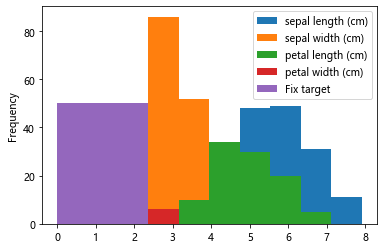

In [28]:
train.plot(kind="hist")

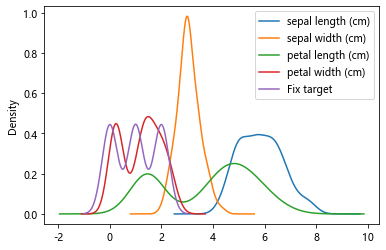

In [29]:
train.plot(kind="kde")

In [ ]:
# 調整figsize及把圖片存下來...
image = train.plot(kind="box",figsize=(10,10)) 
fig = image.get_figure()
fig.savefig("./test.png") # 不支援jpg，可支援pdf